# Analysis Kick Tipp results

## Imports, etc.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os


## Part 1 Overall

In [6]:
import pandas as pd
df=pd.read_csv('data/other/general_overview.csv', sep=";")

In [7]:
df

,Rank,Name,Matchday 1,Matchday 2,Matchday 3,Matchday 4,Matchday 5,Matchday 6,Round of 16,Quarter-final,Semi-finals,Final,Bonus points,Total wins,Total points
0,1,Thullio,14,12,8,8,12,6,14,6,6,4,32,1.08,122
1,2,calzone,15,10,10,4,18,4,12,6,4,2,35,0.75,120
2,3,Blutgrätsche,10,10,12,6,10,13,18,4,4,0,32,2.00,119
3,4,-Yumbo-,15,12,8,6,18,2,10,6,6,2,32,1.08,117
4,5,Suiiiii,10,12,10,4,16,6,14,6,4,2,32,0.25,116
5,6,Raf7l,13,10,10,6,8,6,16,4,6,0,36,1.33,115
6,7,fAME7MANGO,13,14,8,6,16,4,14,4,4,0,32,1.00,115
7,8,Maguire,12,11,6,4,14,10,12,2,2,2,32,0.00,107
8,9,ankaramessi,10,11,14,10,8,4,10,2,2,4,31,2.50,106
9,10,RobertGoatzel,8,8,10,9,12,8,14,0,0,0,32,0.00,101


/var/folders/c0/1t_7scbd0jzcvyrcgttpdfzc0000gn/T/ipykernel_43195/415816005.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Name', y='Total points', data=df, palette='viridis')


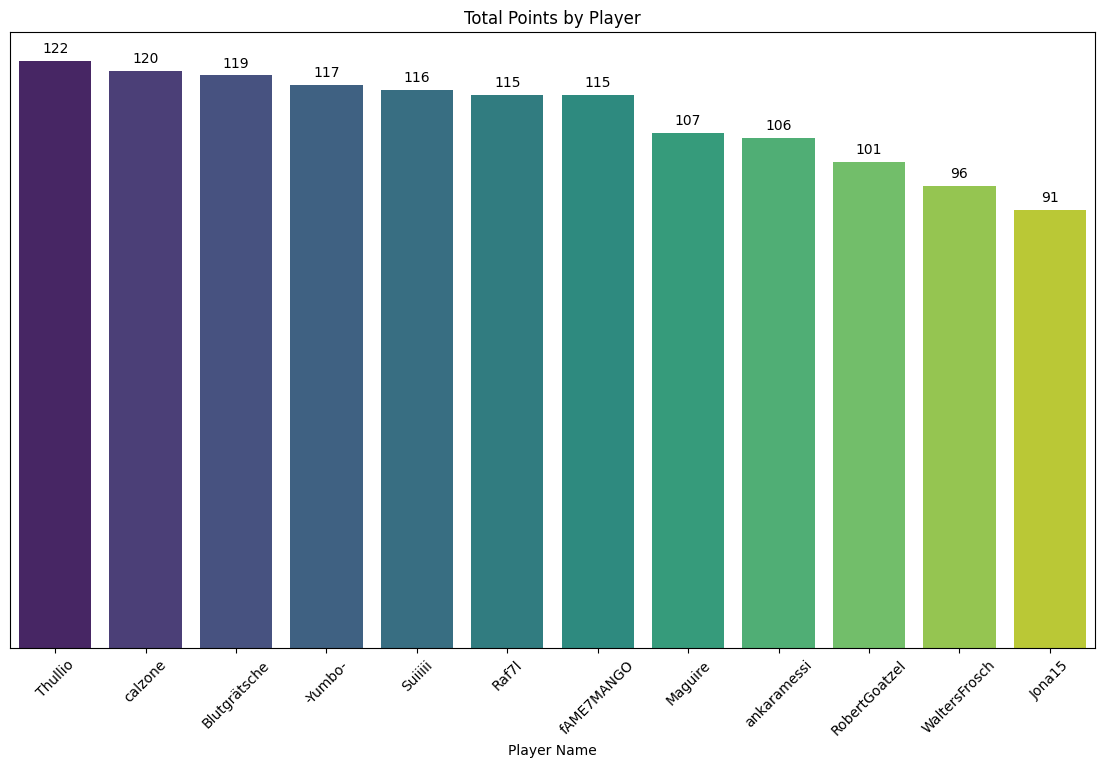

In [16]:
plt.figure(figsize=(14, 8))

bar_plot = sns.barplot(x='Name', y='Total points', data=df, palette='viridis')

plt.title('Total Points by Player')
plt.xlabel('Player Name')
bar_plot.set_ylabel('')
bar_plot.set_yticks([])
plt.xticks(rotation=45)

# Annotate each bar with the total points
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),  # 9 points vertical offset
                      textcoords = 'offset points')


plt.show()

# predictions made

In [17]:
df=pd.read_csv("data/predictions/predictions_matchday_1.csv", delimiter=";")

In [18]:
df

,Name,PlayerID,QAT - ECU,ENG - IRN,SEN - NED,USA - WAL,ARG - SAR,DEN - TUN,MEX - POL,FRA - AUS
0,calzone,43216202,0:1,2:0,1:2,1:1,4:0,2:0,1:1,3:0
1,Raf7l,44020981,0:2,4:1,1:2,2:2,4:0,2:0,1:2,4:0
2,-Yumbo-,43259629,0:2,3:0,0:2,1:2,2:0,2:0,1:1,3:0
3,Thullio,43172570,1:3,2:1,0:2,1:1,4:0,1:0,1:2,3:0
4,fAME7MANGO,42643244,0:1,3:0,0:2,2:1,4:0,3:1,1:1,3:0
5,Maguire,43247573,2:2,3:0,0:2,1:1,5:1,3:0,1:2,2:0
6,Suiiiii,43195189,0:2,3:0,1:2,1:3,4:0,2:0,1:2,2:0
7,Blutgrätsche,43258573,0:1,3:0,0:2,1:2,2:0,1:0,1:2,3:0
8,ankaramessi,43220331,1:1,1:0,1:2,1:1,4:0,2:0,1:0,3:0
9,RobertGoatzel,43991860,0:1,3:1,1:2,2:1,4:0,2:0,1:2,3:0


In [41]:
csv_directory = 'data/predictions'

csv_files = glob.glob(os.path.join(csv_directory, '*.csv'))

combined_df = pd.DataFrame()

for file in csv_files:
    df = pd.read_csv(file, delimiter=";")
    
    df = df.drop(columns=['PlayerID'])
    
    if combined_df.empty:
        combined_df = df
    else:
        combined_df = pd.merge(combined_df, df, on='Name', how='outer')

print(combined_df)


             Name ARG - CRO FRA - MOR CRO - MOR ARG - FRA NED - USA ARG - AUS  \
0         -Yumbo-       2:0       2:0       1:0       1:2       2:1       3:0   
1    Blutgrätsche       2:1       3:1       0:1       1:2       2:1       2:0   
2          Jona15       1:2       6:0       0:1       1:4       2:1       3:1   
3         Maguire       2:1       0:1       0:1       2:1       1:2       3:1   
4           Raf7l       1:0       2:0       NaN       NaN       2:1       2:0   
5   RobertGoatzel       1:2       0:1       NaN       NaN       2:1       2:0   
6         Suiiiii       2:1       3:0       3:2       1:2       2:1       2:0   
7         Thullio       2:1       2:0       1:0       2:1       2:1       3:0   
8   WaltersFrosch       2:1       2:1       NaN   998:999       2:0       2:0   
9     ankaramessi       2:0       1:2       1:0       2:1       2:1       3:0   
10        calzone       2:1       1:0       1:2       2:1       2:1       2:0   
11     fAME7MANGO       1:0 

In [44]:
print(combined_df.iloc[8].to_string())


Name         WaltersFrosch
ARG - CRO              2:1
FRA - MOR              2:1
CRO - MOR            10:10
ARG - FRA          998:999
NED - USA              2:0
ARG - AUS              2:0
FRA - POL              3:0
ENG - SEN              2:0
JPN - CRO              2:1
BRA - KOR              3:0
MOR - ESP              1:2
POR - CH               1:0
QAT - ECU              0:2
ENG - IRN              3:0
SEN - NED              0:2
USA - WAL              1:1
ARG - SAR              4:0
DEN - TUN              2:0
MEX - POL              0:1
FRA - AUS              1:0
WAL - IRN              2:1
QAT - SEN              0:3
NED - ECU              2:0
ENG - USA              2:0
TUN - AUS              1:1
POL - SAR              1:1
FRA - DEN              2:1
ARG - MEX              3:0
MOR - CRO              0:1
GER - JPN              1:0
ESP - CRC              2:0
BEL - CAN              3:1
CH - CMR               2:0
URU - KOR              2:0
POR - GHA              2:0
BRA - SRB              3:1
C

In [49]:
count_998_999 = (combined_df == "3:2").sum().sum()

In [50]:
print(count_998_999)

6


In [43]:
combined_df.fillna('10:10', inplace=True)

/var/folders/c0/1t_7scbd0jzcvyrcgttpdfzc0000gn/T/ipykernel_43195/2641401618.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  normalized_df = combined_df.drop(columns=['Name']).applymap(normalize_result)


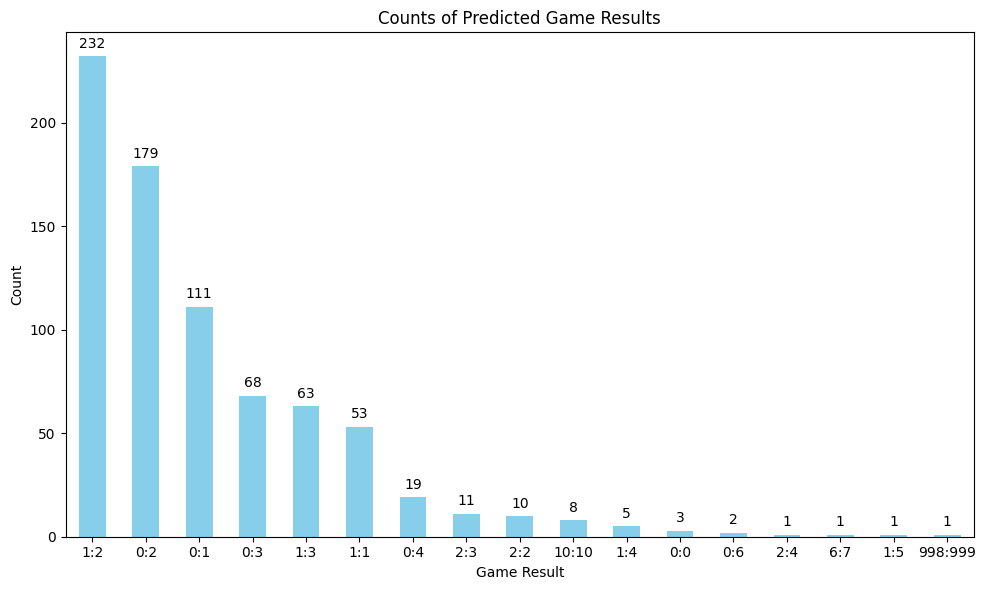

In [61]:
def normalize_result(result):
    parts = result.split(':')
    return ':'.join(sorted(parts))

normalized_df = combined_df.drop(columns=['Name']).applymap(normalize_result)

result_counts = normalized_df.stack().value_counts()

# Plotting the results
plt.figure(figsize=(10, 6))
bar_plot = result_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Predicted Game Results')
plt.xlabel('Game Result')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9),  
                      textcoords='offset points')

plt.show()

In [63]:
def normalize_result(result):
    parts = result.split(':')
    return ':'.join(sorted(parts))

normalized_df = combined_df.drop(columns=['Name']).applymap(normalize_result)

result_counts = normalized_df.stack().value_counts()

result_percentages = result_counts / result_counts.sum() * 100

result_stats_df = pd.DataFrame({'Total Occurrences': result_counts, 'Percentage (%)': result_percentages})

result_stats_df = result_stats_df.sort_values(by='Total Occurrences', ascending=False)

print(result_stats_df)

         Total Occurrences  Percentage (%)
1:2                    232       30.208333
0:2                    179       23.307292
0:1                    111       14.453125
0:3                     68        8.854167
1:3                     63        8.203125
1:1                     53        6.901042
0:4                     19        2.473958
2:3                     11        1.432292
2:2                     10        1.302083
10:10                    8        1.041667
1:4                      5        0.651042
0:0                      3        0.390625
0:6                      2        0.260417
2:4                      1        0.130208
6:7                      1        0.130208
1:5                      1        0.130208
998:999                  1        0.130208


/var/folders/c0/1t_7scbd0jzcvyrcgttpdfzc0000gn/T/ipykernel_43195/1033592201.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  normalized_df = combined_df.drop(columns=['Name']).applymap(normalize_result)


In [77]:
def normalize_result(result):
    parts = result.split(':')
    return ':'.join(sorted(parts))

normalized_df = combined_df.drop(columns=['Name']).applymap(normalize_result)

player_result_counts = {}
player_result_percentages = {}

for player in combined_df['Name']:
    player_results = normalized_df[combined_df['Name'] == player].stack().value_counts()
    total_predictions = player_results.sum()
    player_percentages = (player_results / total_predictions) * 100
    player_result_counts[player] = player_results
    player_result_percentages[player] = player_percentages

result_counts_df = pd.DataFrame(player_result_counts).fillna(0)
result_percentages_df = pd.DataFrame(player_result_percentages).fillna(0)

print("Result Counts for Each Player:")
print(result_counts_df)

print("\nResult Percentages for Each Player:")
print(result_percentages_df)

Result Counts for Each Player:
         -Yumbo-  Blutgrätsche  Jona15  Maguire  Raf7l  RobertGoatzel  \
0:0          0.0           0.0     1.0      0.0    0.0            0.0   
0:1          9.0          10.0     8.0      7.0    5.0           12.0   
0:2         22.0           7.0    12.0     11.0   13.0           13.0   
0:3          4.0           4.0     8.0      5.0    8.0            3.0   
0:4          1.0           2.0     1.0      1.0    4.0            1.0   
0:6          0.0           0.0     1.0      0.0    0.0            0.0   
10:10        2.0           0.0     0.0      0.0    3.0            2.0   
1:1          7.0           2.0     4.0      4.0    3.0            4.0   
1:2         17.0          27.0    21.0     20.0   21.0           20.0   
1:3          2.0           9.0     2.0      7.0    4.0            9.0   
1:4          0.0           0.0     1.0      1.0    1.0            0.0   
1:5          0.0           0.0     0.0      1.0    0.0            0.0   
2:2          0.0    

/var/folders/c0/1t_7scbd0jzcvyrcgttpdfzc0000gn/T/ipykernel_43195/735378759.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  normalized_df = combined_df.drop(columns=['Name']).applymap(normalize_result)


/var/folders/c0/1t_7scbd0jzcvyrcgttpdfzc0000gn/T/ipykernel_43195/85485940.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  normalized_df = combined_df.drop(columns=['Name']).applymap(normalize_result)


<Figure size 1400x800 with 0 Axes>

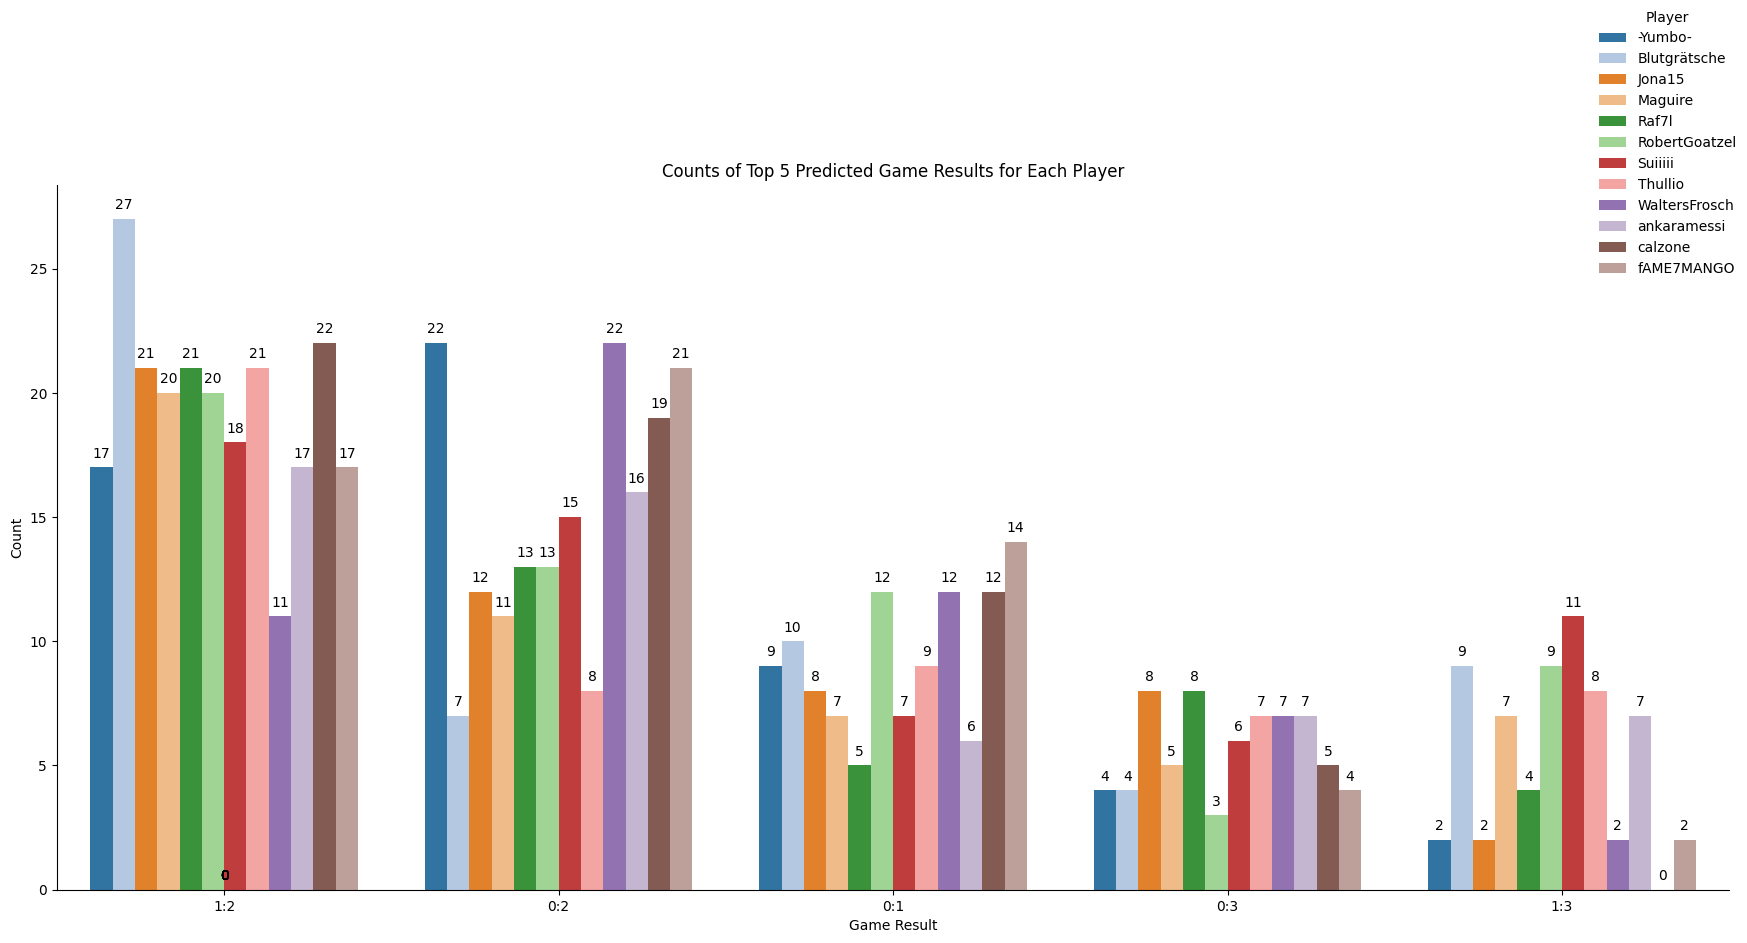

In [76]:
def normalize_result(result):
    parts = result.split(':')
    return ':'.join(sorted(parts))

normalized_df = combined_df.drop(columns=['Name']).applymap(normalize_result)

player_result_counts = {}

for player in combined_df['Name']:
    player_results = normalized_df[combined_df['Name'] == player].stack().value_counts()
    player_result_counts[player] = player_results

result_counts_df = pd.DataFrame(player_result_counts).fillna(0)

total_counts = result_counts_df.sum(axis=1)

top_5_results = total_counts.nlargest(5).index

filtered_result_counts_df = result_counts_df.loc[top_5_results]

filtered_result_counts_df = filtered_result_counts_df.reset_index().melt(id_vars='index', var_name='Player', value_name='Count')
filtered_result_counts_df.rename(columns={'index': 'Result'}, inplace=True)

plt.figure(figsize=(14, 8))
bar_plot = sns.catplot(
    data=filtered_result_counts_df,
    x='Result', y='Count', hue='Player',
    kind='bar', height=8, aspect=2,
    palette='tab20'
)
plt.title('Counts of Top 5 Predicted Game Results for Each Player')
plt.xlabel('Game Result')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
bar_plot._legend.set_bbox_to_anchor((1, 1))
bar_plot._legend.set_title('Player')
ax = bar_plot.facet_axis(0, 0)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                #rotation=45,
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()
